# Two trendlines on the same graph
***
First, import stuff:

In [39]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

Let's say we have a function that is linear up to some point ($x=1$) and then the linear regime breaks down, and the function starts to decay as $1/r$.

Fun fact: electric potential of a charged (solid) sphere with constant charge density $\rho$ does that! :)

\begin{equation}
V(r) = \begin{cases}
2r, & \mbox{if } r < 1 \\
2/r, & \mbox{if } r > 1
\end{cases}
\end{equation}

Here is a fake set of data we might have collected.

In [59]:
# x-values I measured the potential at. 20 data points linearly spaced between 0 and 2
xs = np.linspace(0, 2, 21)

# My function, V(r)
def my_function(x):
    if x < 1:  y = x*2    # return 2x if x < 1
    else:      y = 2/x    # else return 2/x
    return y

# The potential at each value of x - this would be the "perfect" data set
ys    = [my_function(x) for x in xs]

# Random error of my measurements. random.rand(x) creates x random numbers between 0 and 1
# The average of rand() would always be 0.5. Since we want the average random error to be 0,
# Subtract 0.5. Multiply by 0.25 so that the "amplitude" of the error is 0.25, not 1.
noise = 0.25*(np.random.rand(21) - 0.5)

# Create the fake set of data by adding the noise to the ideal measurements
ys = ys + noise

Here's what the data looks like if we just plot it:

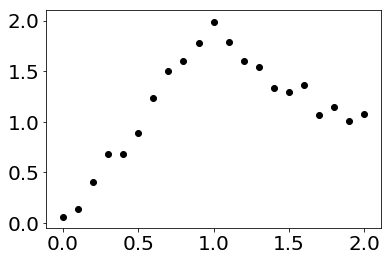

In [84]:
ax = plt.axes()
plt.rcParams["font.size"] = 20
plt.scatter(xs, ys, color="k")

Now, onto plotting two trendlines!

Looking at my data, I decide that there are two regions: x < 1 and x > 1. The first region is linear: $y=A+Bx$. Not knowing any physics about any charged spheres, I decide that the second region is linear as well, with different coefficients $A$ and $B$.

After running curve_fit, I find that
\begin{align}
y_1 =& (0.00 \pm 0.04) + (2.0 \pm 0.07) x \\
y_2 =& (2.7 \pm 0.2) + (-0.9 \pm 0.1) x
\end{align}

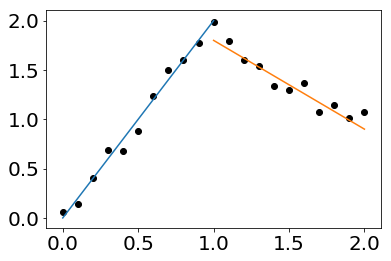

In [85]:
# The two ranges I'm going to use by looking at my data is x < 1 and x > 1 (reassuring, since this is the model!)

# Make a list of xs to plot my model against
xs1 = np.linspace(0, 1, 11)    # 10 values between 0 and 1
xs2 = np.linspace(1, 2, 11)    # 10 values between 1 and 2

# Now, my model is
def linear_model(x, A, B):
    return A + B*x

# Compute the two different models for two different ranges
ymodel_1 = linear_model(xs1, 0, 2)
ymodel_2 = linear_model(xs2, 2.7, -0.9)

# Plot the original data
plt.scatter(xs, ys, color="k")

# Plot the two trendlines
plt.plot(xs1, ymodel_1, color="C0")
plt.plot(xs2, ymodel_2, color="C1")